In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Загрузка данных
data = pd.read_csv("../data/raw/1-2-3-room_2025-05-05_19-58.csv")
data

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,ID 12891703,homeowner,https://www.cian.ru/sale/flat/315747133/,Москва,sale,flat,10,18,1,32.0,-1,0,13590000,Останкинский,Березовая аллея,19к1,Ботанический сад,Апарт-комплекс Легендарный квартал
1,V I B E,real_estate_agent,https://www.cian.ru/sale/flat/314702076/,Москва,sale,flat,2,18,1,41.0,-1,0,22600000,Беговой,Ленинградский проспект,29к3,Динамо,Царская площадь
2,Whitewill,real_estate_agent,https://www.cian.ru/sale/flat/315253252/,Москва,sale,flat,71,79,1,79.0,-1,0,75000000,Пресненский,1-й Красногвардейский проезд,22с2,Москва-Сити,NEVA TOWERS
3,White and Broughton,real_estate_agent,https://www.cian.ru/sale/flat/313640113/,Москва,sale,flat,6,41,1,40.1,-1,0,35500000,Хорошевский,Ленинградский проспект,37/5,Аэропорт,Прайм Парк
4,Семен Гордый,realtor,https://www.cian.ru/sale/flat/286050252/,Москва,sale,flat,5,9,1,42.5,-1,0,7150000,NaN,Семена Гордого,12,Крёкшино,Ново-Никольское
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,На Петровке,real_estate_agent,https://www.cian.ru/sale/flat/309347303/,Москва,sale,flat,11,19,3,90.1,-1,0,67400000,Беговой,Ленинградский проспект,29к1,Динамо,Царская площадь
1685,Novel Estates,real_estate_agent,https://www.cian.ru/sale/flat/314669483/,Москва,sale,flat,28,29,3,117.0,-1,0,65000000,Хорошево-Мневники,Шелепихинская набережная,40к3,Шелепиха,Sydney City
1686,PEOPLE,real_estate_agent,https://www.cian.ru/sale/flat/314118729/,Москва,sale,flat,14,27,3,130.0,-1,0,61900000,Якиманка,Мытная,40к2,Серпуховская,Sky House
1687,ВСЕ НАЧИНАЕТСЯ С МЕЧТЫ,real_estate_agent,https://www.cian.ru/sale/flat/316565559/,Москва,sale,flat,11,26,3,67.1,-1,0,50000000,Хорошевский,Зорге,9Ак1,Зорге,Зорге 9


In [3]:
print("Доступные столбцы:", data.columns.tolist())

Доступные столбцы: ['author', 'author_type', 'url', 'location', 'deal_type', 'accommodation_type', 'floor', 'floors_count', 'rooms_count', 'total_meters', 'price_per_month', 'commissions', 'price', 'district', 'street', 'house_number', 'underground', 'residential_complex']


In [6]:
# Стандартизация признака
scaler = StandardScaler()
data['total_meters'] = scaler.fit_transform(data[['total_meters']])

# Разделение на признаки и целевую переменную
X = data[['total_meters']]  
y = data['price']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вывод метрик качества
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации R²: {r2:.6f}")
print(f"Средняя ошибка предсказания: {np.mean(np.abs(y_test - y_pred)):.2f} рублей")

# Коэффициенты модели
print(f"Коэффициент при площади: {model.coef_[0]:.2f}")
print(f"Свободный член: {model.intercept_:.2f}")

Среднеквадратичная ошибка (MSE): 1931026834506116.50
Корень из среднеквадратичной ошибки (RMSE): 43943450.42
Коэффициент детерминации R²: 0.563265
Средняя ошибка предсказания: 26111469.53 рублей
Коэффициент при площади: 61293824.98
Свободный член: 52779859.86


In [7]:
# 1. Очистка от выбросов
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['price'] >= Q1 - 1.5*IQR) & (data['price'] <= Q3 + 1.5*IQR)]

# 2. Логарифмирование цены
data['log_price'] = np.log1p(data['price'])

# 3. Масштабирование площади
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['scaled_area'] = scaler.fit_transform(data[['total_meters']])

# Используйте новые признаки:
X = data[['scaled_area']]
y = data['log_price']  # Теперь прогнозируем логарифм цены

# После предсказания преобразуйте обратно:
y_pred = np.expm1(model.predict(X_test))  # Из логарифма в рубли

C:\Users\adm\AppData\Local\Temp\ipykernel_20196\1085381165.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_price'] = np.log1p(data['price'])
C:\Users\adm\AppData\Local\Temp\ipykernel_20196\1085381165.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['scaled_area'] = scaler.fit_transform(data[['total_meters']])
C:\Users\adm\AppData\Local\Temp\ipykernel_20196\1085381165.py:20: RuntimeWarning: overflow encountered in expm1
  y_pred = np.expm1(model.predict(X_test))  # Из логарифма в рубли

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)  # Обучаем на логарифмах цен и масштабированной площади

LinearRegression()

In [10]:
# Предсказание логарифмов цен
log_y_pred = model.predict(X_test)

# Преобразование обратно в рубли
y_pred = np.expm1(log_y_pred)
y_test_rubles = np.expm1(y_test)

In [12]:
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test_rubles, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rubles, y_pred)
mae = mean_absolute_error(y_test_rubles, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f} рублей")

MSE: 550055023866333.75
RMSE: 23453251.88
R²: 0.3336
MAE: 14081190.60 рублей


Статистика по ценам:
count    1.547000e+03
mean     3.443884e+07
std      2.754317e+07
min      2.600000e+06
25%      1.330000e+07
50%      2.221000e+07
75%      4.800000e+07
max      1.260000e+08
Name: price, dtype: float64

Корреляция:
              total_meters     price
total_meters      1.000000  0.768394
price             0.768394  1.000000


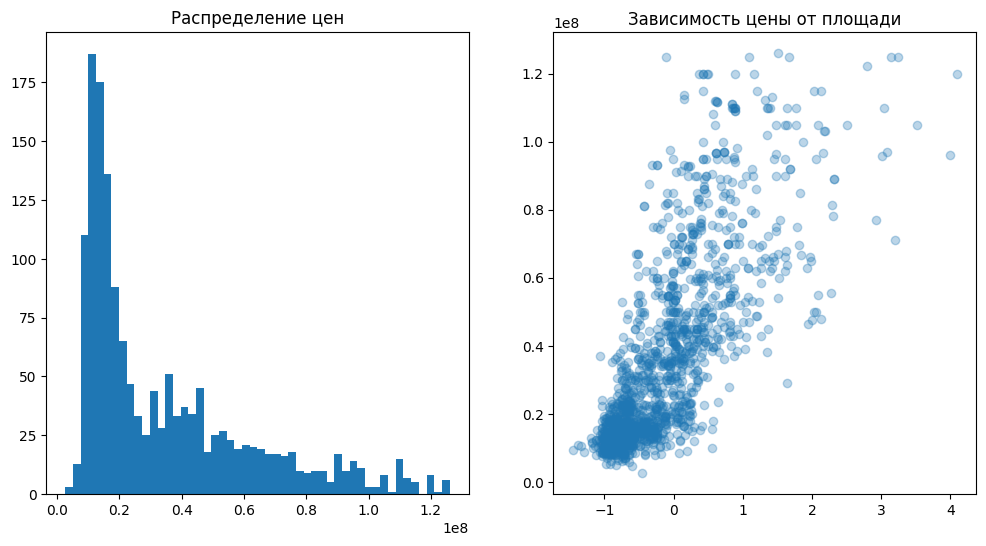

In [14]:
import matplotlib.pyplot as plt
print("Статистика по ценам:")
print(data['price'].describe())

print("\nКорреляция:")
print(data[['total_meters', 'price']].corr())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data['price'], bins=50)
plt.title('Распределение цен')
plt.subplot(1, 2, 2)
plt.scatter(data['total_meters'], data['price'], alpha=0.3)
plt.title('Зависимость цены от площади')
plt.show()

In [15]:
data['log_price'] = np.log1p(data['price'])

C:\Users\adm\AppData\Local\Temp\ipykernel_20196\2447182385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_price'] = np.log1p(data['price'])


In [16]:
# Удаление экстремальных значений (верхние 1%)
price_99th = data['price'].quantile(0.99)
data = data[data['price'] <= price_99th]

# Фильтрация по цене за м²
data['price_per_m2'] = data['price'] / data['total_meters']
q_low = data['price_per_m2'].quantile(0.05)
q_hi = data['price_per_m2'].quantile(0.95)
data = data[(data['price_per_m2'] > q_low) & (data['price_per_m2'] < q_hi)]

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(data[['total_meters']])
data['area_squared'] = X_poly[:, 1]  # Квадрат площади

In [18]:
X = data[['total_meters', 'area_squared']]  # + другие значимые признаки
y = data['log_price']

# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Обучение
model = LinearRegression()
model.fit(X_train, y_train)

# Оценка
y_pred = np.expm1(model.predict(X_test))  # Обратно в рубли
y_test_rubles = np.expm1(y_test)

print(f"MAE: {mean_absolute_error(y_test_rubles, y_pred):,.0f} рублей") 
print(f"R²: {r2_score(y_test_rubles, y_pred):.3f}")

MAE: 10,985,196 рублей
R²: 0.567


In [21]:
import joblib
import os

# Создаем папку models, если её нет
os.makedirs('models', exist_ok=True)

# Сохранение модели
model_path = 'models/linear_regression_model.pkl'

# Проверяем, что модель существует перед сохранением
if 'model' in globals():
    joblib.dump(model, model_path)
    print(f"Модель успешно сохранена в файл {model_path}")
    
    # Загрузка модели для проверки
    try:
        loaded_model = joblib.load(model_path)
        print(f"Модель успешно загружена из {model_path}")
        print(f"Тип загруженной модели: {type(loaded_model)}")
    except Exception as e:
        print(f"Ошибка при загрузке модели: {str(e)}")
else:
    print("Ошибка: модель 'model' не найдена в памяти")

Модель успешно сохранена в файл models/linear_regression_model.pkl
Модель успешно загружена из models/linear_regression_model.pkl
Тип загруженной модели: <class 'sklearn.linear_model._base.LinearRegression'>
